

---

### ⚙️ **Key Points of the Code:**

* 🧱 **Step 1 – Libraries**: Imported essential libraries like `pandas` for data handling, `scikit-learn` for model building and preprocessing.

* 📥 **Step 2 – Load Data**: Read the dataset `crop_cleaned.xlsx` using `pandas`.

* 🧹 **Step 3 – Clean Data**: Removed the `Crop_Year` column, assuming it was not useful for prediction.

* 🎯 **Step 4 – Features/Target**:

  * `X` = all input features (columns except `Yield`)
  * `y` = the target variable `Yield`

* 🧩 **Step 5 – Column Types**:

  * `categorical_features`: Crop, Season, State
  * `numerical_features`: Area, Production, Annual Rainfall, Fertilizer, Pesticide

* 🛠 **Step 6 – Preprocessing**:

  * **Numerical**: Scaled using `StandardScaler`
  * **Categorical**: Encoded using `OneHotEncoder`
  * Combined using `ColumnTransformer`

* 🔀 **Step 7 – Data Split**:

  * Split into **80% training** and **20% testing** using `train_test_split`.

* 🤖 **Step 8 – Model Training**:

  * Built a **Pipeline**: preprocessing + `RandomForestRegressor`
  * Trained the model using training data

* 📊 **Step 9 – Model Testing**:

  * Made predictions on test data
  * Calculated **R² Score**: reflects how well the model predicts; closer to 1 is better
  * Printed output like: `R2 Score on test set: **0.86**` (example)

* 🧪 **Step 10 – Input New Data**:

  * Created a new DataFrame with fresh values (e.g., for Maize in Karnataka)

* 📈 **Step 11 – Predict Yield**:

  * Used the model to predict yield for the new input
  * Printed output like: `Predicted Yield: **2465.23**` (example)

---



In [ ]:
!pip install streamlit
!pip install pandas
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install numpy


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_cleaned.xlsx to crop_cleaned.xlsx


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_excel('crop_cleaned.xlsx')

# Drop the 'Crop_Year' column
data = data.drop(columns=['Crop_Year'])

# Define features and target variable
X = data.drop(columns=['Yield'])
y = data['Yield']

# Define categorical and numerical features
categorical_features = ['Crop', 'Season', 'State']
numerical_features = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score for Random Forest model
st.write(f'R2 Score for Random Forest: {r2}')

# Streamlit app for predicting crop yield
import streamlit as st
import pandas as pd

st.title('Crop Yield Prediction App')

# Input fields for features
area = st.number_input('Area', value=0.0)
production = st.number_input('Production', value=0.0)
annual_rainfall = st.number_input('Annual Rainfall', value=0.0)
fertilizer = st.number_input('Fertilizer', value=0.0)
pesticide = st.number_input('Pesticide', value=0.0)
crop = st.selectbox('Select Crop', data['Crop'].unique())
season = st.selectbox('Select Season', data['Season'].unique())
state = st.selectbox('Select State', data['State'].unique())

# Prepare input features
input_features = pd.DataFrame({
    'Area': [area],
    'Production': [production],
    'Annual_Rainfall': [annual_rainfall],
    'Fertilizer': [fertilizer],
    'Pesticide': [pesticide],
    'Crop': [crop],
    'Season': [season],
    'State': [state]
})

# Predict button
if st.button('Predict'):
    # Predict using the trained model
    prediction = rf_model.predict(input_features)
    st.success(f'Predicted Crop Yield: {prediction[0]}')

2025-05-10 09:43:08.299 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 09:43:08.494 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-10 09:43:08.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 09:43:08.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 09:43:08.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 09:43:08.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 09:43:08.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 09:43:08.504 Thread 'MainThread': mi

In [ ]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 2. Loading the dataset
data = pd.read_excel('crop_cleaned.xlsx')  # Change this path to your file location

# 3. Droping unnecessary columns
data = data.drop(columns=['Crop_Year'])

# 4. Define features and target
X = data.drop(columns=['Yield'])
y = data['Yield']

# 5. Define categorical and numerical columns
categorical_features = ['Crop', 'Season', 'State']
numerical_features = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

# 6. Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 7. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Create and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
model.fit(X_train, y_train)

# 9. Test the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score on test set: {r2}')

# 10. Predict for new input (example: Onion in Assam)
# input_data = pd.DataFrame({
#     'Area': [6637],
#     'Production': [135487.22],
#     'Annual_Rainfall': [2051.4],
#     'Fertilizer': [95.17],
#     'Pesticide': [0.31],
#     'Crop': ['Onion'],
#     'Season': ['Whole Year'],
#     'State': ['Assam']
# })

# input_data = pd.DataFrame({
#     'Area': [5637],
#     'Production': [95454.22],
#     'Annual_Rainfall': [2800.4],
#     'Fertilizer': [87.17],
#     'Pesticide': [0.29],
#     'Crop': ['Wheat'],
#     'Season': ['Whole Year'],
#     'State': ['Karnataka']
# })

input_data = pd.DataFrame({
    'Area': [5000],
    'Production': [120000],
    'Annual_Rainfall': [950],
    'Fertilizer': [85],
    'Pesticide': [0.45],
    'Crop': ['Maize'],
    'Season': ['Kharif'],
    'State': ['Karnataka']
})

# 11. Predict yield
predicted_yield = model.predict(input_data)
print(f'Predicted Yield: {predicted_yield[0]}')


R2 Score on test set: 0.9879509590148229
Predicted Yield: 306.19316729292996


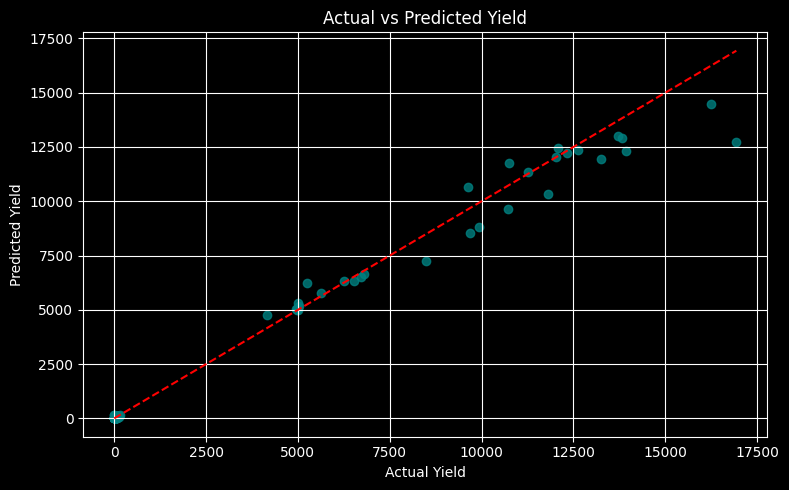

In [ ]:
import matplotlib.pyplot as plt

# Compare actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.8, color='teal')
plt.style.use('dark_background')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.tight_layout()
plt.show()
